In [203]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import sklearn
%matplotlib inline

In [ ]:
need to drop more columns

In [60]:
mort = pd.read_csv('/Users/wickedbear/Coding/Projects/Mortgage_Default/Data_and_Cleaning/revised_mort_data.csv')

In [61]:
mort

,Unnamed: 0,id,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,...,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,ratio_paid
0,0,1,41303.42,24.498336,9.200,226.29,2.899137,4.7,0,0,...,0,45000.0,715,69.4,9.200,87.03,1,0,0,0.082146
1,1,2,105826.38,65.231343,7.680,226.29,2.899137,4.7,0,0,...,0,107200.0,558,80.0,7.680,186.91,0,1,1,0.012814
2,2,3,44866.18,30.551659,10.500,226.29,2.899137,4.7,0,0,...,0,48600.0,680,83.6,8.750,89.58,0,1,1,0.076828
3,4,5,52295.07,65.446133,9.155,226.29,2.899137,4.7,0,0,...,0,52800.0,527,80.0,9.155,186.91,0,1,1,0.009563
4,5,6,209058.33,66.733446,6.580,226.29,2.899137,4.7,0,0,...,0,212000.0,670,80.0,6.580,191.42,1,0,0,0.013876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38053,46281,49966,93568.44,101.865855,6.875,161.13,1.081049,8.0,0,0,...,1,103200.0,726,80.0,6.875,226.29,1,0,0,0.093329
38054,46284,49970,78004.35,101.199851,7.500,161.13,1.081049,8.0,0,0,...,1,86600.0,672,80.0,7.500,226.29,0,1,1,0.099257
38055,46286,49972,180673.24,103.306966,7.500,161.13,1.081049,8.0,0,0,...,0,196000.0,708,79.8,7.500,226.29,1,0,0,0.078198
38056,46297,49983,199721.99,62.251083,6.500,161.13,1.081049,8.0,0,0,...,0,232000.0,665,74.8,6.500,155.77,0,1,1,0.139129


In [62]:
mort = mort.drop(columns='Unnamed: 0')

In [63]:
mort

,id,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,ratio_paid
0,1,41303.42,24.498336,9.200,226.29,2.899137,4.7,0,0,1,0,45000.0,715,69.4,9.200,87.03,1,0,0,0.082146
1,2,105826.38,65.231343,7.680,226.29,2.899137,4.7,0,0,1,0,107200.0,558,80.0,7.680,186.91,0,1,1,0.012814
2,3,44866.18,30.551659,10.500,226.29,2.899137,4.7,0,0,1,0,48600.0,680,83.6,8.750,89.58,0,1,1,0.076828
3,5,52295.07,65.446133,9.155,226.29,2.899137,4.7,0,0,1,0,52800.0,527,80.0,9.155,186.91,0,1,1,0.009563
4,6,209058.33,66.733446,6.580,226.29,2.899137,4.7,0,0,1,0,212000.0,670,80.0,6.580,191.42,1,0,0,0.013876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38053,49966,93568.44,101.865855,6.875,161.13,1.081049,8.0,0,0,1,1,103200.0,726,80.0,6.875,226.29,1,0,0,0.093329
38054,49970,78004.35,101.199851,7.500,161.13,1.081049,8.0,0,0,1,1,86600.0,672,80.0,7.500,226.29,0,1,1,0.099257
38055,49972,180673.24,103.306966,7.500,161.13,1.081049,8.0,0,0,1,0,196000.0,708,79.8,7.500,226.29,1,0,0,0.078198
38056,49983,199721.99,62.251083,6.500,161.13,1.081049,8.0,0,0,0,0,232000.0,665,74.8,6.500,155.77,0,1,1,0.139129


In [64]:
y = mort['status_time']
X = mort.drop(columns=['status_time'], axis=1)

In [65]:
X = X.drop(columns=['id'], axis=1)

In [66]:
X

,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,ratio_paid
0,41303.42,24.498336,9.200,226.29,2.899137,4.7,0,0,1,0,45000.0,715,69.4,9.200,87.03,1,0,0.082146
1,105826.38,65.231343,7.680,226.29,2.899137,4.7,0,0,1,0,107200.0,558,80.0,7.680,186.91,0,1,0.012814
2,44866.18,30.551659,10.500,226.29,2.899137,4.7,0,0,1,0,48600.0,680,83.6,8.750,89.58,0,1,0.076828
3,52295.07,65.446133,9.155,226.29,2.899137,4.7,0,0,1,0,52800.0,527,80.0,9.155,186.91,0,1,0.009563
4,209058.33,66.733446,6.580,226.29,2.899137,4.7,0,0,1,0,212000.0,670,80.0,6.580,191.42,1,0,0.013876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38053,93568.44,101.865855,6.875,161.13,1.081049,8.0,0,0,1,1,103200.0,726,80.0,6.875,226.29,1,0,0.093329
38054,78004.35,101.199851,7.500,161.13,1.081049,8.0,0,0,1,1,86600.0,672,80.0,7.500,226.29,0,1,0.099257
38055,180673.24,103.306966,7.500,161.13,1.081049,8.0,0,0,1,0,196000.0,708,79.8,7.500,226.29,1,0,0.078198
38056,199721.99,62.251083,6.500,161.13,1.081049,8.0,0,0,0,0,232000.0,665,74.8,6.500,155.77,0,1,0.139129


In [71]:
X = X.drop(columns=['ratio_paid'], axis=1)

In [78]:
status_drops = ['default_time', 'payoff_time']

In [84]:
X = X.drop(columns=['default_time'], axis=1)

In [85]:
X = X.drop(columns=['payoff_time'], axis = 1)

In [86]:
X

,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time
0,41303.42,24.498336,9.200,226.29,2.899137,4.7,0,0,1,0,45000.0,715,69.4,9.200,87.03
1,105826.38,65.231343,7.680,226.29,2.899137,4.7,0,0,1,0,107200.0,558,80.0,7.680,186.91
2,44866.18,30.551659,10.500,226.29,2.899137,4.7,0,0,1,0,48600.0,680,83.6,8.750,89.58
3,52295.07,65.446133,9.155,226.29,2.899137,4.7,0,0,1,0,52800.0,527,80.0,9.155,186.91
4,209058.33,66.733446,6.580,226.29,2.899137,4.7,0,0,1,0,212000.0,670,80.0,6.580,191.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38053,93568.44,101.865855,6.875,161.13,1.081049,8.0,0,0,1,1,103200.0,726,80.0,6.875,226.29
38054,78004.35,101.199851,7.500,161.13,1.081049,8.0,0,0,1,1,86600.0,672,80.0,7.500,226.29
38055,180673.24,103.306966,7.500,161.13,1.081049,8.0,0,0,1,0,196000.0,708,79.8,7.500,226.29
38056,199721.99,62.251083,6.500,161.13,1.081049,8.0,0,0,0,0,232000.0,665,74.8,6.500,155.77


In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [88]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X.columns)
scaled_df_train.head()

,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time
0,0.071565,0.530815,-0.357445,0.282826,-0.449073,-0.484745,-0.267497,2.728035,-1.278506,-0.35709,0.062928,0.040742,0.011982,0.377612,0.701193
1,-0.374029,0.917118,1.365226,-0.764856,0.731462,0.961238,-0.267497,-0.366564,0.782163,-0.35709,-0.357801,-1.428879,1.032589,-1.561296,-0.249979
2,-0.374475,-0.276978,0.095889,0.125795,0.706068,0.418995,-0.267497,-0.366564,0.782163,-0.35709,-0.377519,-0.832712,0.011982,0.633694,-0.249979
3,0.584250,0.346269,-1.264114,0.729977,0.462988,-0.484745,-0.267497,-0.366564,0.782163,-0.35709,0.568937,1.621278,0.011982,-0.134552,0.819654
4,-0.794253,-1.372500,0.562176,-2.274703,-0.755463,1.864978,-0.267497,-0.366564,0.782163,-0.35709,-0.791593,-2.233011,-1.896551,-1.561296,-1.652057


In [89]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier()

# Fit the classifier
clf.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = clf.predict(scaled_data_test)

In [90]:
# Import the necessary functions
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [196]:
# Complete the function
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)

Precision Score: 0.7613922986379688
Recall Score: 0.7674576271186441
Accuracy Score: 0.7066736731476616
F1 Score: 0.7644129315438508


In [99]:
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [96]:
clf.predict(scaled_data_train)

array([1, 1, 1, ..., 1, 1, 1])

In [95]:
clf.predict(scaled_data_test)

array([1, 1, 1, ..., 1, 1, 1])

In [161]:
# tuning the k parameter 
# instantiate the model (using the value K=3)
clf = KNeighborsClassifier(n_neighbors=3)

# fit the model with data
clf.fit(scaled_data_train, y_train)

# predict the response for new observations
a1 = clf.predict(scaled_data_test)
a2 = clf.predict(X)
a3 = clf.predict(scaled_data_train)

print_metrics(y_train, a3)

Precision Score: 0.8567860116569526
Recall Score: 0.8756453168434788
Accuracy Score: 0.8328136495813334
F1 Score: 0.8661130127377813


In [163]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_train, a3, labels=None, sample_weight=None))
print(classification_report(y_train, a3))

[[ 8336  2580]
 [ 2192 15435]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.78     10916
           1       0.86      0.88      0.87     17627

    accuracy                           0.83     28543
   macro avg       0.82      0.82      0.82     28543
weighted avg       0.83      0.83      0.83     28543



In [164]:
# tuning the k parameter 
# instantiate the model (using the value K=3)
clf = KNeighborsClassifier(n_neighbors=3)

# fit the model with data
clf.fit(scaled_data_train, y_train)

# predict the response for new observations
a1 = clf.predict(scaled_data_test)
a2 = clf.predict(X)
a3 = clf.predict(scaled_data_train)

print_metrics(y_test, a1)

Precision Score: 0.7465453319851703
Recall Score: 0.7508474576271187
Accuracy Score: 0.6874408828166053
F1 Score: 0.7486902146357952


In [165]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, a1, labels=None, sample_weight=None))
print(classification_report(y_test, a1))

[[2111 1504]
 [1470 4430]]
              precision    recall  f1-score   support

           0       0.59      0.58      0.59      3615
           1       0.75      0.75      0.75      5900

    accuracy                           0.69      9515
   macro avg       0.67      0.67      0.67      9515
weighted avg       0.69      0.69      0.69      9515



In [166]:
# tuning the k parameter 
# instantiate the model (using the value K=5)
clf = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
clf.fit(scaled_data_train, y_train)

# predict the response for new observations
a1 = clf.predict(scaled_data_test)
a2 = clf.predict(X)
a3 = clf.predict(scaled_data_train)

print_metrics(y_test, a1)

Precision Score: 0.7613922986379688
Recall Score: 0.7674576271186441
Accuracy Score: 0.7066736731476616
F1 Score: 0.7644129315438508


In [167]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, a1, labels=None, sample_weight=None))
print(classification_report(y_test, a1))

[[2196 1419]
 [1372 4528]]
              precision    recall  f1-score   support

           0       0.62      0.61      0.61      3615
           1       0.76      0.77      0.76      5900

    accuracy                           0.71      9515
   macro avg       0.69      0.69      0.69      9515
weighted avg       0.71      0.71      0.71      9515



In [168]:
# tuning the k parameter 
# instantiate the model (using the value K=10)
clf = KNeighborsClassifier(n_neighbors=10)

# fit the model with data
clf.fit(scaled_data_train, y_train)

# predict the response for new observations
a1 = clf.predict(X)
a2 = clf.predict(scaled_data_train)
a3 = clf.predict(scaled_data_test)

print_metrics(y_test, a3)

Precision Score: 0.7858683926645091
Recall Score: 0.7408474576271187
Accuracy Score: 0.7141355754072517
F1 Score: 0.7626941196998779


In [170]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, a3, labels=None, sample_weight=None))
print(classification_report(y_test, a3))

[[2424 1191]
 [1529 4371]]
              precision    recall  f1-score   support

           0       0.61      0.67      0.64      3615
           1       0.79      0.74      0.76      5900

    accuracy                           0.71      9515
   macro avg       0.70      0.71      0.70      9515
weighted avg       0.72      0.71      0.72      9515



In [171]:
# search for an optimal value of K for KNN
k_range = list(range(1, 11))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaled_data_train, y_train)
    y_predict = knn.predict(scaled_data_test)
    score = f1_score(y_test, y_predict)
    k_scores.append( score)
print(k_scores)

[0.7164255756226997, 0.6449929761188038, 0.7486902146357952, 0.7166436145689259, 0.7644129315438508, 0.7405006302899333, 0.7681012658227849, 0.7559876270437473, 0.7751638380104184, 0.7626941196998779]


In [183]:
max(k_scores)

0.7751638380104184

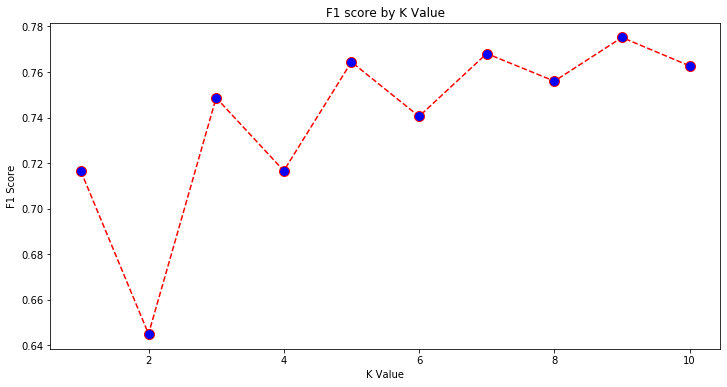

In [172]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 11), k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('F1 score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

9 appears to be the optimal K value

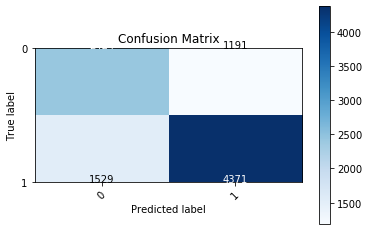

In [176]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

# Create the basic matrix
plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) 

# Add title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add appropriate axis scales
class_names = set(y) # Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add labels to each cell
thresh = cnf_matrix.max() / 2. # Used for text coloring below
# Here we iterate through the confusion matrix and append labels to our visualization 
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment='center',
                 color='white' if cnf_matrix[i, j] > thresh else 'black')

# Add a legend
plt.colorbar()
plt.show()

In [177]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    # Pseudocode/Outline:
    # Print the confusion matrix (optional)
    # Create the basic matrix
    # Add title and axis labels
    # Add appropriate axis scales
    # Add labels to each cell
    # Add a legend
    
    print(cm)

    plt.imshow(cm, cmap=cmap)
    
    # Add title and axis labels 
    plt.title('Confusion Matrix') 
    plt.ylabel('True label') 
    plt.xlabel('Predicted label')
    
    # Add appropriate axis scales
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Text formatting
    fmt = '.2f' if normalize else 'd'
    # Add labels to each cell
    thresh = cm.max() / 2.
    # Here we iterate through the confusion matrix and append labels to our visualization 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    # Add a legend
    plt.colorbar()
    plt.show() 

In [178]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    # Check if normalize is set to True
    # If so, normalize the raw confusion matrix before visualizing
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, cmap=cmap)
    
    # Add title and axis labels 
    plt.title('Confusion Matrix') 
    plt.ylabel('True label') 
    plt.xlabel('Predicted label')
    
    # Add appropriate axis scales
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Text formatting
    fmt = '.2f' if normalize else 'd'
    # Add labels to each cell
    thresh = cm.max() / 2.
    # Here we iterate through the confusion matrix and append labels to our visualization 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    # Add a legend
    plt.colorbar()
    plt.show() 

Normalized confusion matrix
[[0.67053942 0.32946058]
 [0.25915254 0.74084746]]


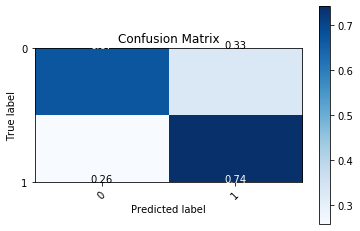

In [179]:
# Plot a normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

In [185]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(scaled_data_train, y_train)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(scaled_data_train)
dummy_clf.score(scaled_data_train, y_train)

0.6175594716743159

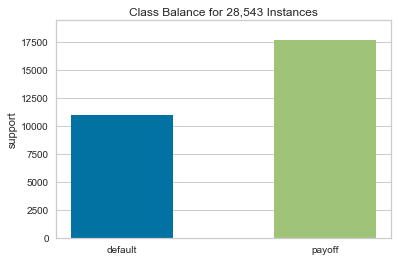

In [198]:
from yellowbrick.datasets import load_game
from yellowbrick.target import ClassBalance

# Load the classification dataset
# X, y = load_game()

# Instantiate the visualizer
visualizer = ClassBalance(labels=["default", "payoff"])

visualizer.fit(y_train)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure